# How to Scrape Data directly from stats.nba.com
#### By Derrick Shu - Twitter @LiangShu23

## Intro

I've seen several methods for scraping nba data from their offical website, some of the notable ones being the [nba_py](https://github.com/seemethere/nba_py) package, which utilizes json files and requset data directly from the NBA's website using their API. However, because I was not aware of this tool, I built my own "scrape nba website" tool. And here is a walk through of how I did it.

Just as a disclamer, mine is not nearly as advanced and easy to use compaered to what the guys over at nba_py have created, and if you are trying to get a more consistent way of getting data from [stats.nba.com](stats.nba.com), I would highly recommend using their API package. But anyways, I just wanted to share what I as able to come up with because I am afterall, a bit proud that I was able to do this. 

Also, I love the NBA & basketball and have actually written a few articles on players like Dorian Finney-Smith and Dejounte Murray, if that sounds interesting to you, you can check em' out [here](www.basketrap.com/author/derrick)|

## What you will need

1. A python environment with the following packages
- time
- bs4 (beautifulsoup), this helps us scrape from the html scripts on each page
- selenium, our main driver for automating the scraping process
2. seleneium's chromedriver (or honestly whichever browsers' you would prefer) which you can download [here](https://pypi.org/project/selenium/)
3. pandas, dataframe creation and manipulation

Once you have all that setup, go ahead and run the following code

In [2]:
import time
import bs4 as bs
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait

import os
import sys

You have two main options for doing this, either with a locally using your ide or scripting program, or online using jupyter notebook. Here are the links for downloading selenium on [your computer](https://pypi.org/project/selenium/) or for your [jupyter lab](https://shanyitan.medium.com/how-to-install-selenium-and-run-it-successfully-via-jupyter-lab-c3f50d22a0d4). For a better demonstration for how this works, I'll be doing my example on jupyter notebook, though usually I use Visual Studio for my scraping. 

Next you want to make sure you have your selenium driver at the correct location for our codes to find, so find/set you rdirectory and drop the driver.exe file in that path. You can find your directory by running the code below. I just have my driver in my overall conda enviroment. 

In [7]:
os.path.dirname(sys.executable)

'D:\\Conda'

Let's run a quick test to see if selenium is working properly by running the code below. 

In [3]:
# enter path to your selenium chrome driver
Path = 'D:/conda/chromedriver.exe'
# setting up driver
driver = webdriver.Chrome(executable_path = Path)
# testing to open up website, wait for 5 seconds, and close
driver.get("https://www.nba.com/stats/")
time.sleep(5)
driver.close()

If everything went according to plan, you should see the chrome driver pop up, go to the nba stats website, and automatically close after 5 seconds.


## The Process

Okay! Now let's begin the process of scraping stats.nba.com using selenium and beautiful soup!

To start things off, you probably saw a pop-up that looks like this when you tested the selenium driver, so let's try and get rid of it so we can get to the actual page.

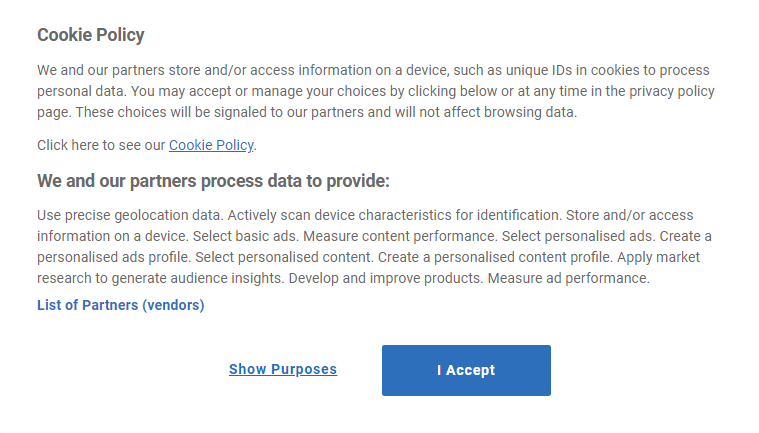

In order to do so, we need to get selenium to identify the <font color = blue>**"I accept"**</font> button and click on it. And in order to do so we need to take a look at the html code. We can pull up the html code by inspecting the page (right clicking anywhere on the page and clicking <u>inpsect</u>, then we can identify the object name of the <font color = blue>**"I accept"**</font> button by right clicking on the button and pressing <u>inspect</u> once more. Doing so would automatically bring us the html code that corresponds with this button, as you can see in the screenshot below. 

We can see that the button has the id of "onetrust-accept-btn-handler".

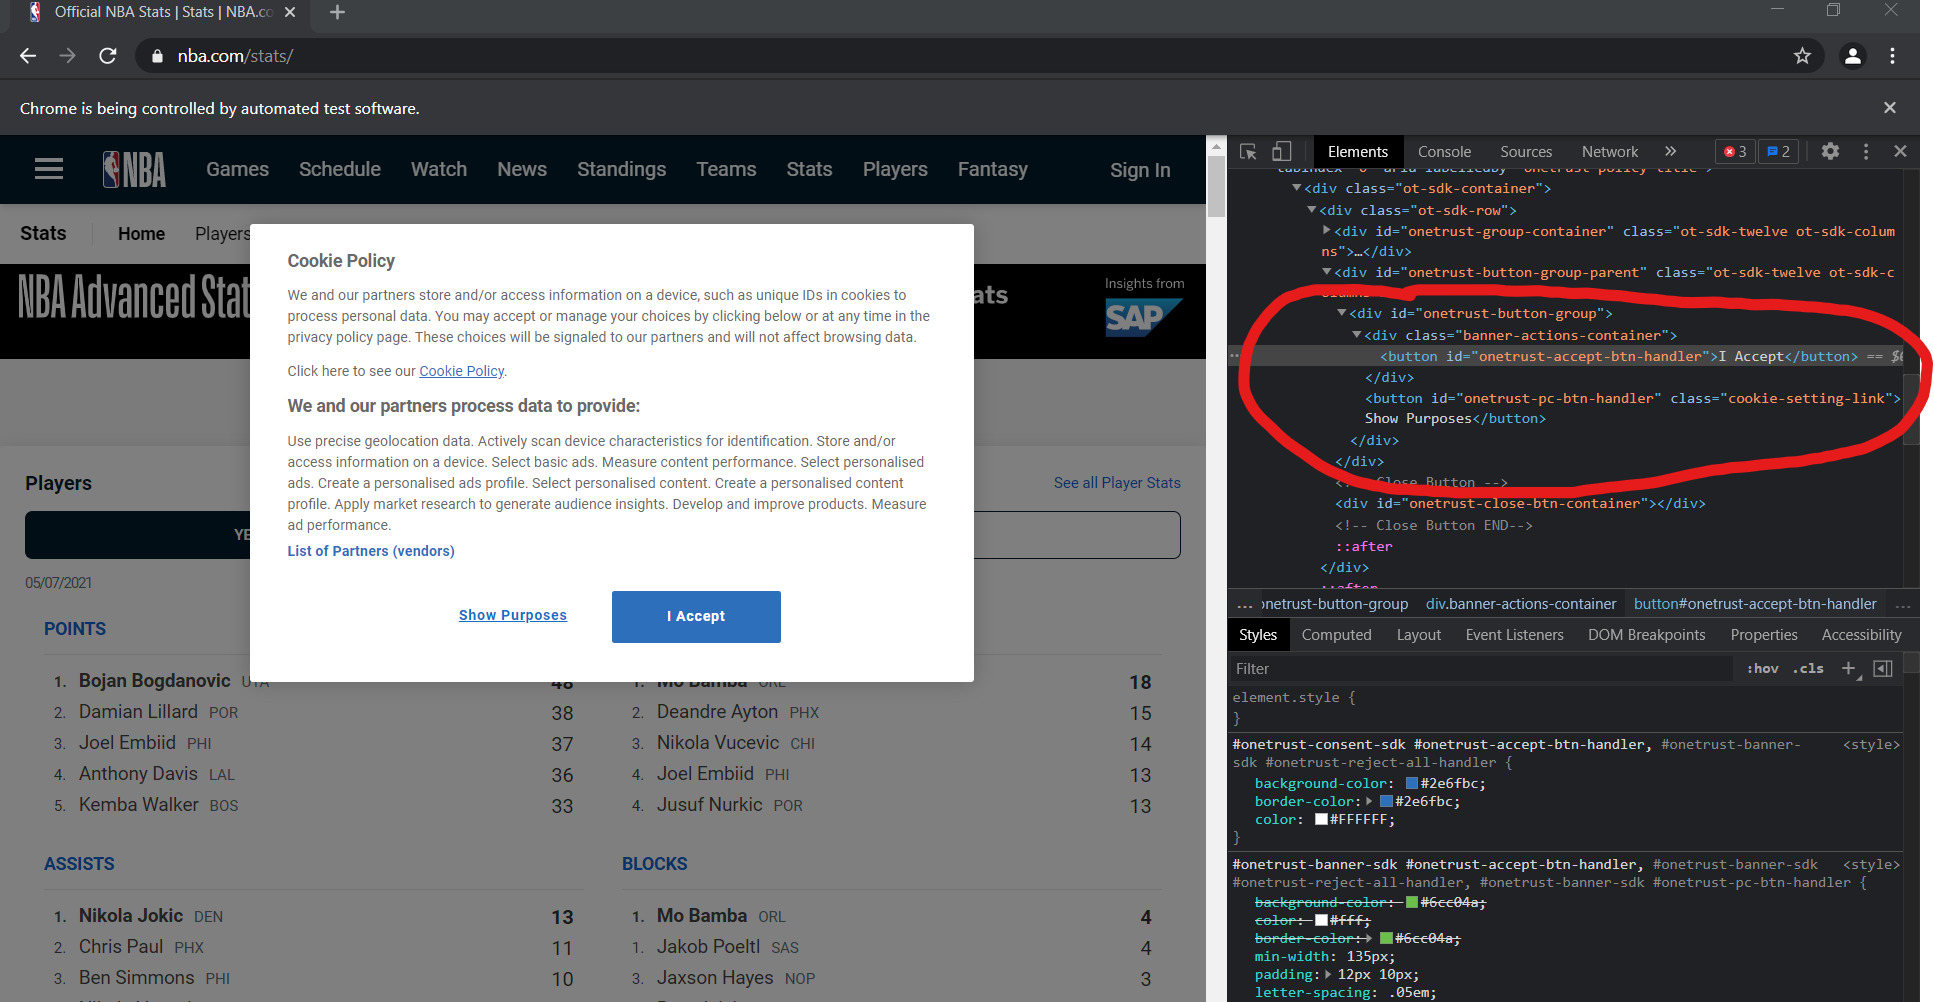

In [ ]:
# first we define the full url of the page we want to scarpe
link = "https://www.nba.com/stats/"

driver = webdriver.Chrome(executable_path = Path)
driver.get(link)

# ask selenium to wait 15 seconds, or until the button shows up and is located by the driver
try:
    WebDriverWait(driver,15).until(
        EC.presence_of_element_located((By.ID, 'onetrust-accept-btn-handler'))
    )
except:
    pass
# identify the button and use selenium's click() function to press it
element = driver.find_element_by_id('onetrust-accept-btn-handler')
element.click()


We can see that the driver loads the page, and the notification would disappear as we expected it to.

Also, since the current link doesn't have a table for us to scrape, I'll simply change the link to the total shooting separeated by 5ft intervals for the current nba season by redifining the "link" object.

In [5]:
link = 'https://www.nba.com/stats/players/shooting/?Season=2020-21&SeasonType=Regular%20Season&PerMode=Totals'

driver = webdriver.Chrome(executable_path = Path)
driver.get(link)
try:
    WebDriverWait(driver,15).until(
        EC.presence_of_element_located((By.ID, 'onetrust-accept-btn-handler'))
    )
except:
    pass
# identify the button and use selenium's click() function to press it
element = driver.find_element_by_id('onetrust-accept-btn-handler')
element.click()

Please don't close this current chrome(*or whichever driver you ware using*) window.Now lets <u> inspect</u> the html code and see how we can identify the table we want to scrapt. 

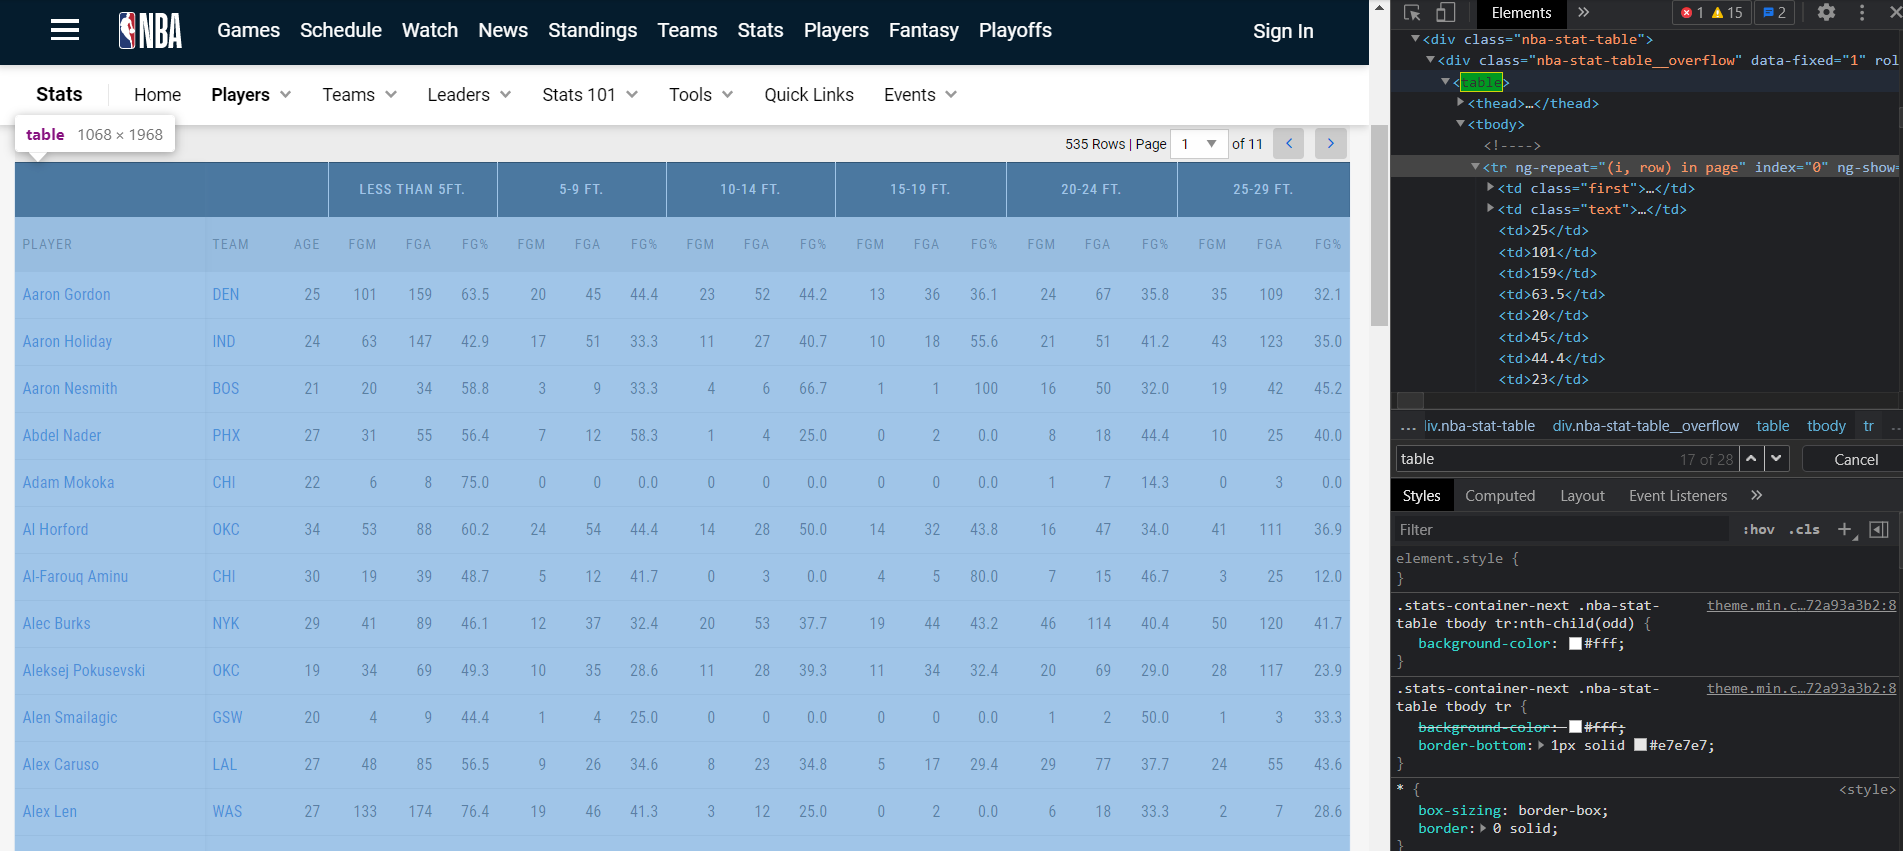

The part that we want to scrape is under the table element (currently this method only works for the *first* table on each page, but it would work fine when you're scrapping overall league-wide stats (like our case where this table alone is all the info we need right now). Note that inside the table component, each player is represented by a table row, annotated with <tr . Last but not least, we can see that there are 11 pages, which contains data for 535 players. 
    
Now we use beautiful soup to get the html code for the page and find the table. Then we would use a loop function to make a list of all the table rows.

Let's take a look at what that gives us. 

In [37]:
# %%capture
# Get html code & find table
source = bs.BeautifulSoup(driver.page_source, 'html.parser').find('table')
# Loop through html code to make list of all table rows
whole = [b for b in source.find_all('tr')]

# looking at a portion of the output
print(whole[5:8])

[<tr aria-hidden="true" class="ng-hide" ng-show="params.DistanceRange==='By Zone'">
<th class="first" colspan="1" data-field="PLAYER_NAME">Player</th>
<th cf="" class="text" data-field="TEAM_ABBREVIATION" ripple="" sort="">TEAM</th>
<th cf="" data-field="AGE" ripple="" sort="">AGE</th>
<th cf="" class="grouped" data-field="Restricted Area FGM" ripple="" sort="">FGM</th>
<th cf="" class="grouped" data-field="Restricted Area FGA" ripple="" sort="">FGA</th>
<th cf="" class="grouped" data-field="Restricted Area FG PCT" ripple="" sort="">
            FG%
          </th>
<th cf="" class="grouped" data-field="In The Paint (Non-RA) FGM" ripple="" sort="">
            FGM
          </th>
<th cf="" class="grouped" data-field="In The Paint (Non-RA) FGA" ripple="" sort="">
            FGA
          </th>
<th cf="" class="grouped" data-field="In The Paint (Non-RA) FG PCT" ripple="" sort="">
            FG%
          </th>
<th cf="" class="grouped" data-field="Mid-Range FGM" ripple="" sort="">FGM</t

Fisrt of all, oof, this text string is obviously not ready for us to tranform into a table. 
But let's take a look at the html and see how we could possibly process all this into useable data.

One of the first things we can learn is how the NBA organizes these data tables. If you go back onto the [shooting page]('https://www.nba.com/stats/players/shooting/?Season=2020-21&SeasonType=Regular%20Season&PerMode=Totals'), you will see that there are several options we can choose when filtering what type of data we want to see. For our specific case, we have the options to choose "PER MODE" (season total or per game numbers) and "DISTANCE RANGE" (5ft, 8ft, and by zone) as we want. 

Here's how the website determines which stats gets shown or not shown (accoding to our inputs for "PER MDOE"&"DISTANCE RANGE": They have all the data loaded in the background simply toggles whether the information is shown on the screen at the moment. By using an attribute called aria-hidden, which takes either "true" or "false". (If shown on page, "aria=hidden = "false")

Perhaps the best way to illustrate this is by looking into the hmtl codes themselves and compare the rows with differnt values for the attribute "aria-hidden". Try and use your browser's search function (Ctrl+F or Cmd+F) and seach for the name of Pelicans forward, Brandon Ingram. 

There will be four matches, three from the html codes we were able to scrape, and the fourth one would be ^this^.

In the first three matches, you will see that only the first one's <tr aria-hidden attribute has the value "false" since that one corresponds to the currently selected "5ft" for "DISTANCE RANGE". The other two would have <tr aria-hidden = "true" since they are currently not shown on the page.  



With all that said, let's take a look at what we can do to isolate the text & numbers we need by using the replace function. As an example, I will clean the data of the first table row: Denver Nugget forward, Aaron Gordon's stats.

In [38]:
# Extract the text from the first table row
Aaron = whole[6].text
print(Aaron)

Aaron = Aaron.replace('  ', '')
print(Aaron)

Aaron = Aaron.replace('\n', ',')
print(Aaron)

Aaron = Aaron.replace(',,', ',')
print(Aaron)

Aaron = Aaron.replace(',,', ',')
print(Aaron)

Aaron = Aaron.replace('\xa0', '')
print(Aaron)
print('\n')
Aaron = Aaron.split(',')
print(Aaron)




Trevor Ariza


MIA

35
37
70
52.9
1
5
20.0
0
2
0.0
1
3
33.3
22
64
34.4
21
57
36.8



Trevor Ariza


MIA

35
37
70
52.9
1
5
20.0
0
2
0.0
1
3
33.3
22
64
34.4
21
57
36.8

,,Trevor Ariza,,,MIA,,35,37,70,52.9,1,5,20.0,0,2,0.0,1,3,33.3,22,64,34.4,21,57,36.8,
,Trevor Ariza,,MIA,35,37,70,52.9,1,5,20.0,0,2,0.0,1,3,33.3,22,64,34.4,21,57,36.8,
,Trevor Ariza,MIA,35,37,70,52.9,1,5,20.0,0,2,0.0,1,3,33.3,22,64,34.4,21,57,36.8,
,Trevor Ariza,MIA,35,37,70,52.9,1,5,20.0,0,2,0.0,1,3,33.3,22,64,34.4,21,57,36.8,


['', 'Trevor Ariza', 'MIA', '35', '37', '70', '52.9', '1', '5', '20.0', '0', '2', '0.0', '1', '3', '33.3', '22', '64', '34.4', '21', '57', '36.8', '']


By using several replace()s and a final split() call, we were able to get the final output.
Now we just need to write a function that 
- does just that for every single row that is currently shown (aria-hidden = "false") and 
- adds it to a larger, overaching list

In [13]:
criteria = '<tr aria-hidden="false"'
# for some pages the criteria could be different so make sure you have the corerct criteria.
# NBA changes their website fairly often, and the critera often changes with each update.

# create empty, large list
temp = []

# define function to loop through the html code, cleans each row, and appends each row to our list object.
def scrapepage():
    source = bs.BeautifulSoup(driver.page_source, 'html.parser').find('table')
    whole = [b for b in source.find_all('tr')]
    for i in range(0,len(whole)):
        blockstr = str(whole[i])
        # print(blockstr)
        if blockstr.startswith(criteria):
            row_text = whole[i].text
            row_text = row_text.replace('  ', '')
            #print(row_text)
            row_text = row_text.replace('\n', ',')
            #print(row_text)
            row_text = row_text.replace(',,', ',')
            #print(row_text)
            row_text = row_text.replace(',,', ',')
            #print(row_text)
            row_text = row_text.replace('\xa0', '')
            #print(row_text)
            row_text = row_text.split(',')
            #print(team_data)
            temp.append(row_text)

            
# let's call scrapepage() and see what our temp object looks like
scrapepage()
# looking at results from first few table rows
print(temp[1:7])

[['', 'Player', 'TEAM', 'AGE', 'FGM', 'FGA', 'FG%', 'FGM', 'FGA', 'FG%', 'FGM', 'FGA', 'FG%', 'FGM', 'FGA', 'FG%', 'FGM', 'FGA', 'FG%', 'FGM', 'FGA', 'FG%', ''], ['', 'Aaron Gordon', 'DEN', '25', '101', '159', '63.5', '20', '45', '44.4', '23', '52', '44.2', '13', '36', '36.1', '24', '67', '35.8', '35', '109', '32.1', ''], ['', 'Aaron Holiday', 'IND', '24', '63', '147', '42.9', '17', '51', '33.3', '11', '27', '40.7', '10', '18', '55.6', '21', '51', '41.2', '43', '123', '35.0', ''], ['', 'Aaron Nesmith', 'BOS', '21', '20', '34', '58.8', '3', '9', '33.3', '4', '6', '66.7', '1', '1', '100', '16', '50', '32.0', '19', '42', '45.2', ''], ['', 'Abdel Nader', 'PHX', '27', '31', '55', '56.4', '7', '12', '58.3', '1', '4', '25.0', '0', '2', '0.0', '8', '18', '44.4', '10', '25', '40.0', ''], ['', 'Adam Mokoka', 'CHI', '22', '6', '8', '75.0', '0', '0', '0.0', '0', '0', '0.0', '0', '0', '0.0', '1', '7', '14.3', '0', '3', '0.0', '']]


Looks pretty good! 
Now we just need to define a new function that helps us move to the next page aand do it all over again!

We would be approaching this the same way we worked around the <font color = blue>**"I accept"**</font> button. 
Using find_element_by_class_name() function.

In [15]:
def nextpage():
    driver.implicitly_wait(3)
    next = driver.find_element_by_class_name('stats-table-pagination__next')
    next.click()
    driver.implicitly_wait(2)
    print('moving to next page')
# The implicitly_wait function serves the same purpose as the time.sleep() function
# The second implicit_wait() was added so that the browser has some time to load the page before the scrapepage() is ran

Now we just need to run the two function repeatedly in a for loop of range(0,11), remember we got the 11 from the page number on the screen shot of the page earlier. 
Also, remember to redefine temp to an empty list so we dont append all the data we get here on top of what we already had earlier.

Also, the jupyter notebook driver could be a bit more unstable, so make sure you let the driver do its thing and don't click or scroll along the process. 

In [39]:
temp = []

# restart selenium driver to start at corerct page
link = 'https://www.nba.com/stats/players/shooting/?Season=2020-21&SeasonType=Regular%20Season&PerMode=Totals'

driver = webdriver.Chrome(executable_path = Path)
driver.get(link)

# "I accept" Button
try:
    WebDriverWait(driver,15).until(
        EC.presence_of_element_located((By.ID, 'onetrust-accept-btn-handler'))
    )
except:
    pass
# identify the button and use selenium's click() function to press it
element = driver.find_element_by_id('onetrust-accept-btn-handler')
element.click()

#Actual for loop
for i in range (0,11):
    scrapepage()
    nextpage()

# looking at results from later table rows
print(temp[100:107])

moving to next page
moving to next page
moving to next page
moving to next page
moving to next page
moving to next page
moving to next page
moving to next page
moving to next page
moving to next page
moving to next page
[['', 'Damyean Dotson', 'CLE', '27', '34', '52', '65.4', '7', '14', '50.0', '5', '16', '31.3', '11', '27', '40.7', '21', '62', '33.9', '22', '85', '25.9', ''], ['', 'Daniel Gafford', 'WAS', '22', '124', '159', '78.0', '10', '29', '34.5', '2', '6', '33.3', '1', '4', '25.0', '0', '0', '0.0', '0', '0', '0.0', ''], ['', 'Daniel Oturu', 'LAC', '21', '10', '17', '58.8', '2', '6', '33.3', '3', '4', '75.0', '0', '0', '0.0', '0', '1', '0.0', '0', '1', '0.0', ''], ['', 'Daniel Theis', 'CHI', '29', '137', '180', '76.1', '16', '38', '42.1', '25', '44', '56.8', '21', '44', '47.7', '22', '67', '32.8', '28', '86', '32.6', ''], ['', '', 'Lessthan5ft.', '5-9ft.', '10-14ft.', '15-19ft.', '20-24ft.', '25-29ft.', ''], ['', 'Player', 'TEAM', 'AGE', 'FGM', 'FGA', 'FG%', 'FGM', 'FGA', 'FG%', 

Now we get to the most laborious part of the scraping process. Writing up column names(mostly this) and turning the data we just scraped into a dataframe. 
We want to drop the two columns "Blank" and "Blank 2" once we create the dataframe, since those were creted because of how we chose to isolate the texts & numbers. 

In [34]:
# defining column names
shooting_by_5ft_columns = ['Blank','Player','Team','Age','LT5 FGM','LT5 FGA','LT5 prct', 'Five-Nine FGM','Five-Nine FGA','Five-Nine prct',
           'Ten-Fourteen FGM','Ten-Fourteen FGA','Ten-Fourteen prct','Fifteen-Nineteen FGM','Fifteen-Nineteen FGA','Fifteen-Nineteen prct',
           'Twenty-TwentyFour FGM','Twenty-TwentyFour FGA','Twenty-TwentyFour prct','TwentyFive-TwentyNine FGM',
           'TwentyFive-TwentyNine FGA','TwentyFive-TwentyNine prct','Blank2']

# Convert temp into a pandas dataframe
df = pd.DataFrame(temp, columns = shooting_by_5ft_columns)

# remove blank columns
df = df.drop(columns=['Blank','Blank2'])

# checking top of the dataframe, only looking at 3 columns
pd.set_option("display.max_columns", 3)
# run following line to see all columns
# pd.set_option("display.max_columns", None)

print(df.head(55))

                Player  ... TwentyFive-TwentyNine prct
0                       ...                       None
1               Player  ...                        FG%
2         Aaron Gordon  ...                       32.1
3        Aaron Holiday  ...                       35.0
4        Aaron Nesmith  ...                       45.2
5          Abdel Nader  ...                       40.0
6          Adam Mokoka  ...                        0.0
7           Al Horford  ...                       36.9
8      Al-Farouq Aminu  ...                       12.0
9           Alec Burks  ...                       41.7
10  Aleksej Pokusevski  ...                       23.9
11      Alen Smailagic  ...                       33.3
12         Alex Caruso  ...                       43.6
13            Alex Len  ...                       28.6
14    Alfonzo McKinnie  ...                       31.3
15       Alize Johnson  ...                       25.0
16        Amida Brimah  ...                        0.0
17        

If you looked carefully, you can see that for each page, selenium scrapes the two header rows on each run of scrapepage() because they were technically also <tr lines. Thus we just need to define one last function to remove all the rows that starts with <u>"Player"</u> and the row directly above it. Example would be row 52 & 53 in the output above. We don't need to worry about not having column names because those were pre-defined as part of the dataframe in the previous step!

In [35]:
# This function returns row numbers we want to remove
def get_rep_title_axis(dfname):
    # create empty list
    wrong_rows = []
    #start loop for 0 to number of rows in dataframe
    for i in range(0, dfname.shape[0]):
        # using index loc to match rows in which the first element is "Player"
        if dfname.iloc[i,0] == 'Player':
            # If you want you can print the identified rows to double check using the next line
            # print(i)
            # append the row number & the row number directly above it that we want to remove to the empty list
            wrong_rows.append(i-1)
            wrong_rows.append(i)
        else:
            pass

    return wrong_rows
# checking the results
print(get_rep_title_axis(df))

[0, 1, 52, 53, 104, 105, 156, 157, 208, 209, 260, 261, 312, 313, 364, 365, 416, 417, 468, 469, 520, 521]


The results seems good considering that each page contained information for 50 players, and the numbers seems to be 2 consecutive numbers with a interval of 50. 

Thus, we now just need to drop these rows, and we will have a clean dataset with player shooting numbers by zone!
Also, we can drop the <u>"Index"</u> column because pandas has index setup for us already!

In [36]:
# Dropping rows we identified above
df = df.drop(index = get_rep_title_axis(df)).reset_index()
# Dropping index column
df = df.drop(columns = ['index'])
# Checking to see if we have succesfully did what we intended to do
print(df.head(55))


                Player  ... TwentyFive-TwentyNine prct
0         Aaron Gordon  ...                       32.1
1        Aaron Holiday  ...                       35.0
2        Aaron Nesmith  ...                       45.2
3          Abdel Nader  ...                       40.0
4          Adam Mokoka  ...                        0.0
5           Al Horford  ...                       36.9
6      Al-Farouq Aminu  ...                       12.0
7           Alec Burks  ...                       41.7
8   Aleksej Pokusevski  ...                       23.9
9       Alen Smailagic  ...                       33.3
10         Alex Caruso  ...                       43.6
11            Alex Len  ...                       28.6
12    Alfonzo McKinnie  ...                       31.3
13       Alize Johnson  ...                       25.0
14        Amida Brimah  ...                        0.0
15         Amir Coffey  ...                       32.3
16    Anderson Varejao  ...                        0.0
17      An

Seeing the names Brook Lopez, Bruce Brown, Bruno Caboclo, and Bruno Fernando should make you happy not only because they're good NBA players that we should all respect, but also because seeing their name means that we have successfully removed the header rows!
Becareful not to run the previous code multiple times because that will just keep removing new rows that we actually want to keep. If you accidentally mess up, running the code in which we defined the dataframe should reset everything. 

Last but not least, we can finally save our data to a file and use it in additional analyses or data visualizations!

In [ ]:
# export file
df.to_csv("D:/______________/Player_shooting_by_5ft_zone_2021._._.csv")

Well, this marks the end of this tutorial!
I hope this was helpful and that you were able to find a way to get the information you need!

Just to summarize a few things, the things we need to provide/input ourselves are:
- selenium driver and its path
- link to stats.nba.com page
- criteria (<tr aria-hidden="false")
- number of pages in for loop
- pandas dataframe column names
                
If you liked this tutorial, consider dropping ya boy a follow on [Twitter](https://twitter.com/liangshu23?lang=en) on @LiangShu23 or reading my NBA articles on [Basketrap](www.basketrap.com/author/derrick)!